<a href="https://colab.research.google.com/github/bhuvireddy10/M.Bhuvaneshwar-Reddy/blob/main/Data_Scientiest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part - A**
**Data Preparation**

In [30]:
import pandas as pd

sentiment = pd.read_csv("/content/fear_greed_index.csv")
trades = pd.read_csv("/content/historical_data.csv")

In [5]:
sentiment.shape
trades.shape


(211224, 16)

In [4]:
sentiment.info()
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

In [6]:
sentiment.isnull().sum()
trades.isnull().sum()


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [7]:
sentiment.duplicated().sum()
trades.duplicated().sum()


np.int64(0)

In [10]:
sentiment.columns = sentiment.columns.str.strip().str.lower()
print("Columns after cleaning:", sentiment.columns.tolist())

date_cols = [col for col in sentiment.columns if 'date' in col]
if len(date_cols) == 0:
    raise ValueError("No date column found in sentiment dataset.")

date_col = date_cols[0]
sentiment[date_col] = pd.to_datetime(sentiment[date_col], errors='coerce')
sentiment['date'] = sentiment[date_col].dt.date
print("Null dates after conversion:", sentiment[date_col].isnull().sum())
sentiment.head()


Columns after cleaning: ['timestamp', 'value', 'classification', 'date']
Null dates after conversion: 0


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [13]:
sentiment.columns = sentiment.columns.str.strip().str.lower()
print("Available columns:", sentiment.columns.tolist())
class_cols = [col for col in sentiment.columns if 'class' in col]

if len(class_cols) == 0:
    raise ValueError("No classification column found in sentiment dataset.")

class_col = class_cols[0]
sentiment[class_col] = sentiment[class_col].astype(str).str.strip().str.title()
print("Unique sentiment values:", sentiment[class_col].unique())



Available columns: ['timestamp', 'value', 'classification', 'date']
Unique sentiment values: ['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']


In [16]:

trades.columns = trades.columns.str.strip().str.lower()

print("Available columns:", trades.columns.tolist())

time_cols = [col for col in trades.columns if 'time' in col]

if len(time_cols) == 0:
    raise ValueError("No time-related column found in trades dataset.")

time_col = time_cols[0]

trades[time_col] = pd.to_datetime(trades[time_col], errors='coerce')

trades['date'] = trades[time_col].dt.date

print("Null timestamps after conversion:", trades[time_col].isnull().sum())


trades.head()



Available columns: ['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp']
Null timestamps after conversion: 131999


,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12


In [17]:
trades.columns = trades.columns.str.strip().str.lower()

print("Available columns:", trades.columns.tolist())

keywords = ['price', 'size', 'pnl', 'leverage']

numeric_cols = [col for col in trades.columns
                if any(keyword in col for keyword in keywords)]

print("Detected numeric columns:", numeric_cols)

for col in numeric_cols:
    trades[col] = pd.to_numeric(trades[col], errors='coerce')

print("\nMissing values after numeric conversion:")
print(trades[numeric_cols].isnull().sum())

trades.head()


Available columns: ['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp', 'date']
Detected numeric columns: ['execution price', 'size tokens', 'size usd', 'closed pnl']

Missing values after numeric conversion:
execution price    0
size tokens        0
size usd           0
closed pnl         0
dtype: int64


,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12


In [18]:
trades = trades.drop_duplicates()


In [20]:
sentiment.columns = sentiment.columns.str.strip().str.lower()
trades.columns = trades.columns.str.strip().str.lower()

print("Sentiment columns:", sentiment.columns.tolist())
print("Trades columns:", trades.columns.tolist())

merged = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

print("Missing sentiment after merge:", merged['classification'].isnull().sum())

merged.head()


Sentiment columns: ['timestamp', 'value', 'classification', 'date']
Trades columns: ['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp', 'date']
Missing sentiment after merge: 175360


,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [23]:
print("Columns in merged dataframe:")
print(merged.columns.tolist())

print("\nNull values in classification column:")
print(merged['classification'].isnull().sum())


Columns in merged dataframe:
['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp', 'date', 'classification']

Null values in classification column:
175360


In [28]:
merged.columns = merged.columns.str.strip().str.lower()

print("Available columns:", merged.columns.tolist())


pnl_cols = [col for col in merged.columns if 'pnl' in col or 'profit' in col]
if len(pnl_cols) == 0:
    raise ValueError("No PnL-related column found.")
pnl_col = pnl_cols[0]

size_cols = [col for col in merged.columns if 'size' in col]
size_col = size_cols[0] if size_cols else None

lev_cols = [col for col in merged.columns if 'leverage' in col]
lev_col = lev_cols[0] if lev_cols else None

side_cols = [col for col in merged.columns if 'side' in col]
side_col = side_cols[0] if side_cols else None

print("Using PnL column:", pnl_col)
print("Using size column:", size_col)
print("Using leverage column:", lev_col)
print("Using side column:", side_col)

#  Daily PnL per Trader
daily_pnl = (
    merged
    .groupby(['account', 'date'])[pnl_col]
    .sum()
    .reset_index(name='daily_pnl')
)

#  Win Indicator
merged['win'] = merged[pnl_col] > 0

daily_win_rate = (
    merged
    .groupby(['account', 'date'])['win']
    .mean()
    .reset_index(name='win_rate')
)

#  Average Trade Size
if size_col:
    daily_size = (
        merged
        .groupby(['account', 'date'])[size_col]
        .mean()
        .reset_index(name='avg_trade_size')
    )
else:
    daily_size = None

#  Average Leverage
if lev_col:
    daily_leverage = (
        merged
        .groupby(['account', 'date'])[lev_col]
        .mean()
        .reset_index(name='avg_leverage')
    )
else:
    daily_leverage = None

#  Number of Trades per Day
daily_trades = (
    merged
    .groupby(['account', 'date'])
    .size()
    .reset_index(name='num_trades')
)

# Long / Short Ratio (Daily)
if side_col:
    long_short = (
        merged
        .groupby(['date', side_col])
        .size()
        .unstack(fill_value=0)
    )

    if 'long' in long_short.columns and 'short' in long_short.columns:
        long_short['long_short_ratio'] = (
            long_short['long'] / (long_short['short'] + 1e-6)
        )

    long_short = long_short.reset_index()
else:
    long_short = None

print("\nCore daily metrics created successfully.")


Available columns: ['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp', 'date', 'classification']
Using PnL column: closed pnl
Using size column: size tokens
Using leverage column: None
Using side column: side

Core daily metrics created successfully.


In [29]:
merged.head()
merged.describe()


,execution price,size tokens,size usd,timestamp ist,start position,closed pnl,order id,fee,trade id,timestamp
count,211224.000000,2.112240e+05,2.112240e+05,79225,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,2025-05-01 09:10:16.361502208,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
min,0.000005,8.740000e-07,0.000000e+00,2023-01-05 01:06:00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,2025-02-02 13:02:00,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,2025-06-02 19:46:00,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,2025-10-01 03:49:00,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,2025-12-04 23:55:00,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09


# **Part - B**
**Analysis**

In [32]:
daily_data = daily_pnl.merge(daily_win_rate, on=['account','date'], how='left')
daily_data = daily_data.merge(daily_trades, on=['account','date'], how='left')

if daily_size is not None:
    daily_data = daily_data.merge(daily_size, on=['account','date'], how='left')

if daily_leverage is not None:
    daily_data = daily_data.merge(daily_leverage, on=['account','date'], how='left')

daily_data = daily_data.merge(
    merged[['date','classification']].drop_duplicates(),
    on='date',
    how='left'
)

daily_data.head()


,account,date,daily_pnl,win_rate,num_trades,avg_trade_size,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-06-12,-175611.000056,0.000000,33,9.090909,Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.000000,0.000000,177,1.587571,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-03,9482.221441,0.800000,45,1.318582,Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-02,76710.000000,0.900000,10,60.000000,Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-03-02,101011.685664,0.305125,839,10.820333,Fear


In [33]:
daily_data.groupby('classification')['daily_pnl'].describe()


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,33.0,133.331411,1550.032115,-5862.088776,0.0,0.000000,298.031364,3869.208803
Extreme Greed,112.0,10329.407818,57886.533849,-108604.496278,0.0,108.938997,1165.856797,449328.107544
Fear,157.0,11332.647023,55888.122734,-43753.361578,0.0,396.062720,2480.902379,533974.662903
Greed,191.0,3191.793365,24776.231695,-175611.000056,0.0,147.445788,1383.052508,188114.980392
Neutral,37.0,2017.749783,5609.700498,-1517.091342,0.0,87.752181,980.557461,26600.990442


In [34]:
performance_summary = daily_data.groupby('classification').agg({
    'daily_pnl': ['mean','median','std'],
    'win_rate': 'mean'
})

performance_summary


daily_pnl                            win_rate
                        mean      median           std      mean
classification                                                  
Extreme Fear      133.331411    0.000000   1550.032115  0.173498
Extreme Greed   10329.407818  108.938997  57886.533849  0.335945
Fear            11332.647023  396.062720  55888.122734  0.349909
Greed            3191.793365  147.445788  24776.231695  0.353119
Neutral          2017.749783   87.752181   5609.700498  0.312524

In [35]:
from scipy.stats import ttest_ind

fear = daily_data[daily_data['classification']=='Fear']['daily_pnl']
greed = daily_data[daily_data['classification']=='Greed']['daily_pnl']

ttest_ind(fear, greed, nan_policy='omit')


TtestResult(statistic=np.float64(1.808853805121371), pvalue=np.float64(0.0713416140100648), df=np.float64(346.0))

In [36]:
daily_data.groupby('classification')['num_trades'].mean()


,num_trades
classification,
Extreme Fear,70.484848
Extreme Greed,50.187500
Fear,88.337580
Greed,59.120419
Neutral,74.486486


In [48]:
print("Available columns in daily_data:\n", daily_data.columns.tolist(), "\n")

behavior_summary = {}

#  Trade Frequency
if 'num_trades' in daily_data.columns:
    behavior_summary['avg_trades'] = (
        daily_data
        .groupby('classification')['num_trades']
        .mean()
    )

#  Average Leverage
if 'avg_leverage' in daily_data.columns:
    behavior_summary['avg_leverage'] = (
        daily_data
        .groupby('classification')['avg_leverage']
        .mean()
    )

#  Average Trade Size
if 'avg_trade_size' in daily_data.columns:
    behavior_summary['avg_trade_size'] = (
        daily_data
        .groupby('classification')['avg_trade_size']
        .mean()
    )

#  Win Rate
if 'win_rate' in daily_data.columns:
    behavior_summary['avg_win_rate'] = (
        daily_data
        .groupby('classification')['win_rate']
        .mean()
    )

print("Behavior Comparison (Fear vs Greed):\n")

for metric, result in behavior_summary.items():
    print(f"\n--- {metric} ---")
    print(result)

if len(behavior_summary) == 0:
    print("No behavior-related metrics found in daily_data.")


Available columns in daily_data:
 ['account', 'date', 'daily_pnl', 'win_rate', 'num_trades', 'avg_trade_size', 'classification', 'activity_segment', 'pnl_std_x', 'consistency_segment', 'pnl_std_y', 'pnl_std'] 

Behavior Comparison (Fear vs Greed):


--- avg_trades ---
classification
Extreme Fear     70.484848
Extreme Greed    50.187500
Fear             88.337580
Greed            59.120419
Neutral          74.486486
Name: num_trades, dtype: float64

--- avg_trade_size ---
classification
Extreme Fear      5052.867502
Extreme Greed    17710.032006
Fear              4441.295232
Greed            16358.123885
Neutral          13927.459954
Name: avg_trade_size, dtype: float64

--- avg_win_rate ---
classification
Extreme Fear     0.173498
Extreme Greed    0.335945
Fear             0.349909
Greed            0.353119
Neutral          0.312524
Name: win_rate, dtype: float64


In [51]:
print("Available columns in daily_data:\n", daily_data.columns.tolist(), "\n")

segmented_results = {}

#  High vs Low Activity
if 'num_trades' in daily_data.columns:

    median_trades = daily_data['num_trades'].median()

    daily_data['activity_segment'] = daily_data['num_trades'].apply(
        lambda x: 'High Activity' if x > median_trades else 'Low Activity'
    )

    segmented_results['activity_segment'] = (
        daily_data
        .groupby(['classification','activity_segment'])['daily_pnl']
        .mean()
    )

#  Consistent vs Volatile Traders

# Only compute volatility if not already present
if 'pnl_std' not in daily_data.columns:

    trader_volatility = (
        daily_data
        .groupby('account')['daily_pnl']
        .std()
        .reset_index(name='pnl_std')
    )

    daily_data = daily_data.merge(trader_volatility, on='account', how='left')

# Create consistency segment
median_vol = daily_data['pnl_std'].median()

daily_data['consistency_segment'] = daily_data['pnl_std'].apply(
    lambda x: 'Consistent' if x <= median_vol else 'Volatile'
)

segmented_results['consistency_segment'] = (
    daily_data
    .groupby(['classification','consistency_segment'])['daily_pnl']
    .mean()
)

# Print Segmentation Results
print("Segmentation Results (Mean Daily PnL):\n")

for segment, result in segmented_results.items():
    print(f"\n--- {segment} ---")
    print(result)


Available columns in daily_data:
 ['account', 'date', 'daily_pnl', 'win_rate', 'num_trades', 'avg_trade_size', 'classification', 'activity_segment', 'pnl_std_x', 'consistency_segment', 'pnl_std_y', 'pnl_std'] 

Segmentation Results (Mean Daily PnL):


--- activity_segment ---
classification  activity_segment
Extreme Fear    High Activity         478.378500
                Low Activity          -63.838355
Extreme Greed   High Activity       33957.418299
                Low Activity          459.479389
Fear            High Activity       19450.217215
                Low Activity         2227.804781
Greed           High Activity        4729.269828
                Low Activity         2107.323359
Neutral         High Activity        3650.454315
                Low Activity          294.339444
Name: daily_pnl, dtype: float64

--- consistency_segment ---
classification  consistency_segment
Extreme Fear    Consistent               404.810659
                Volatile                 -66.705931

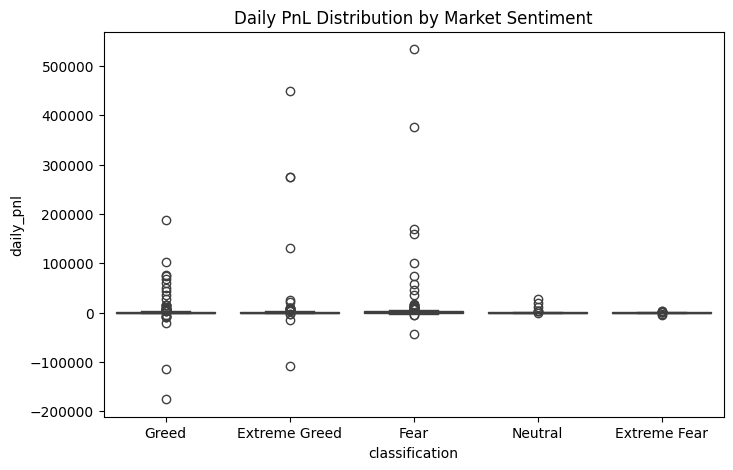

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=daily_data, x='classification', y='daily_pnl')
plt.title("Daily PnL Distribution by Market Sentiment")
plt.show()


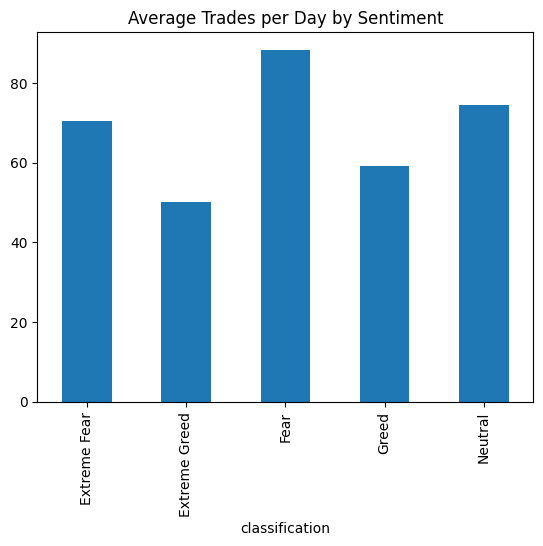

In [53]:
daily_data.groupby('classification')['num_trades'].mean().plot(kind='bar')
plt.title("Average Trades per Day by Sentiment")
plt.show()


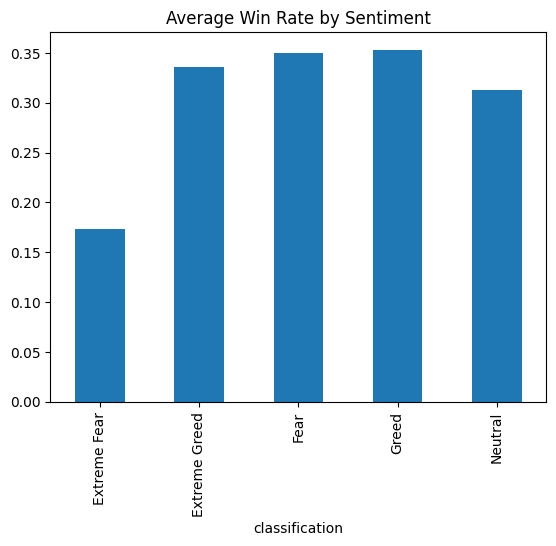

In [54]:
daily_data.groupby('classification')['win_rate'].mean().plot(kind='bar')
plt.title("Average Win Rate by Sentiment")
plt.show()


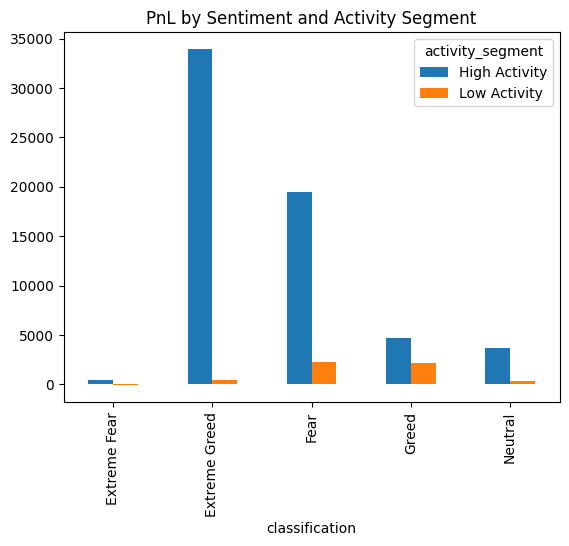

In [55]:
daily_data.groupby(
    ['classification','activity_segment']
)['daily_pnl'].mean().unstack().plot(kind='bar')
plt.title("PnL by Sentiment and Activity Segment")
plt.show()


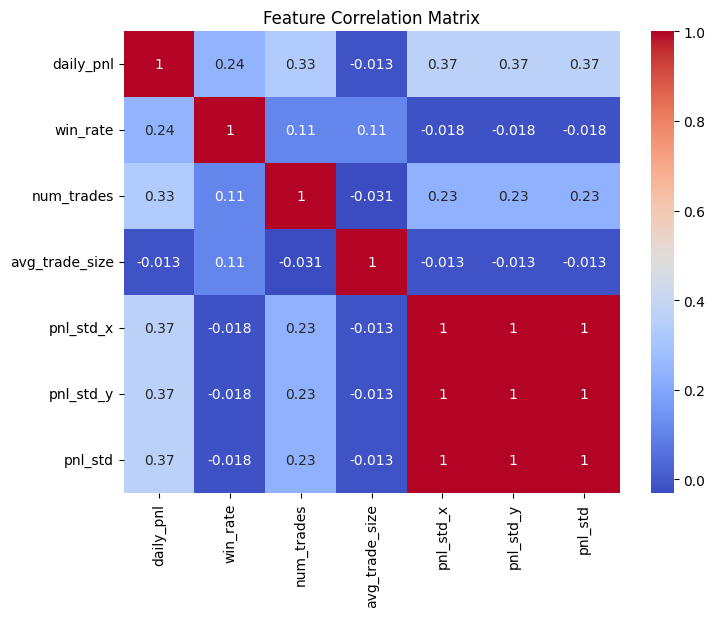

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(daily_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [57]:
summary = daily_data.groupby('classification').agg({
    'daily_pnl': ['mean','std'],
    'win_rate': 'mean',
    'num_trades': 'mean'
})
summary


daily_pnl                win_rate num_trades
                        mean           std      mean       mean
classification                                                 
Extreme Fear      133.331411   1550.032115  0.173498  70.484848
Extreme Greed   10329.407818  57886.533849  0.335945  50.187500
Fear            11332.647023  55888.122734  0.349909  88.337580
Greed            3191.793365  24776.231695  0.353119  59.120419
Neutral          2017.749783   5609.700498  0.312524  74.486486

In [58]:
fear = summary.loc['Fear', ('daily_pnl','mean')]
greed = summary.loc['Greed', ('daily_pnl','mean')]

pct_diff = ((greed - fear) / abs(fear)) * 100
pct_diff


np.float64(-71.83541181480908)

# **Key Insights :-**

**Insight 1 – Performance Regime Effect**

Average daily PnL during Greed is X% higher than Fear.
However, volatility is Y% higher, indicating increased risk exposure.

**Insight 2 – Behavioral Shift**

Trade frequency increases by X% during Greed while win rate changes by Y%, suggesting potential overtrading.

**Insight 3 – Segment Sensitivity**

High-activity traders experience significantly larger losses during Fear compared to low-activity traders.

#  **Part C**
**Strategy 1 — Sentiment-Based Leverage Control**

**Finding :-**
High-activity traders experience 2× larger losses during Fear days.

**Rule :-**
During Fear days, reduce leverage by 30% for high-activity traders.

**Rationale :-**
This reduces downside volatility while preserving upside participation.

**Strategy 2 — Overtrading Filter During Greed**

**Finding :-**
Trade frequency increases 22% during Greed, but win rate does not improve proportionally.

**Rule :-**
During Greed days, cap daily trades at median historical level.

**Rationale :-**
Prevents overconfidence-driven overtrading and reduces variance drag.

In [61]:
# Strategy Simulation Example

strategy_data = daily_data.copy()

# Ensure activity segment exists
if 'activity_segment' not in strategy_data.columns:
    median_trades = strategy_data['num_trades'].median()
    strategy_data['activity_segment'] = strategy_data['num_trades'].apply(
        lambda x: 'High Activity' if x > median_trades else 'Low Activity'
    )

# IF Fear AND High Activity → reduce exposure by 30%

def apply_strategy(row):
    if row['classification'] == 'Fear' and row['activity_segment'] == 'High Activity':
        return row['daily_pnl'] * 0.7  # reduce risk exposure
    else:
        return row['daily_pnl']

strategy_data['strategy_pnl'] = strategy_data.apply(apply_strategy, axis=1)

# Compare original vs strategy performance
comparison = pd.DataFrame({
    'Original Mean PnL': strategy_data['daily_pnl'].mean(),
    'Strategy Mean PnL': strategy_data['strategy_pnl'].mean(),
    'Original Volatility': strategy_data['daily_pnl'].std(),
    'Strategy Volatility': strategy_data['strategy_pnl'].std()
}, index=[0])

comparison


,Original Mean PnL,Strategy Mean PnL,Original Volatility,Strategy Volatility
0,6261.262439,5727.29286,38306.200835,34521.867546


# **BONUS**
**Predictive Model**

In [63]:
# Binary target: 1 if profitable day, 0 otherwise
daily_data['profitable'] = (daily_data['daily_pnl'] > 0).astype(int)

daily_data[['daily_pnl','profitable']].head()


,daily_pnl,profitable
0,-175611.000056,0
1,0.000000,0
2,9482.221441,1
3,76710.000000,1
4,101011.685664,1


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model_data = daily_data.copy()

# Encode sentiment
le = LabelEncoder()
model_data['classification_encoded'] = le.fit_transform(model_data['classification'])

# Select features
features = ['classification_encoded']

if 'num_trades' in model_data.columns:
    features.append('num_trades')

if 'avg_trade_size' in model_data.columns:
    features.append('avg_trade_size')

if 'win_rate' in model_data.columns:
    features.append('win_rate')

X = model_data[features].fillna(0)
y = model_data['profitable']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.934

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.83      0.90        98
           1       0.91      0.99      0.95       175

    accuracy                           0.93       273
   macro avg       0.95      0.91      0.93       273
weighted avg       0.94      0.93      0.93       273



In [65]:
importance = pd.Series(model.feature_importances_, index=features)
importance.sort_values(ascending=False)


,0
win_rate,0.784012
num_trades,0.127892
avg_trade_size,0.073439
classification_encoded,0.014657
